# Pandas Intermediate 1

**Description:** This notebook describes how to:
* Use the PyArrow backend to improve processing speed
* Group and aggregate data
* Make pivot tables

**Knowledge Required:** 
* Python Basics ([Start Python Basics I](../basic/python-basics-1.ipynb))
* Pandas Basics ([Start Pandas Basics I](./pandas-1.ipynb))

**Knowledge Recommended:** 
* [Python Intermediate 2](../intermediate/python-intermediate-2.ipynb)
* [Python Intermediate 4](../intermediate/python-intermediate-4.ipynb)

___

In [1]:
# import Pandas
import pandas as pd

# check the version of the installed pandas
pd.__version__

'2.3.1'

In [2]:
# set the max items to display to 20
pd.options.display.max_seq_items = 20

In April 2023, Pandas 2.0 was released. The defining feature of this release is the new  PyArrow backend. 

In Pandas basics, we have learned how to read data from files of different formats into a dataframe using the `read_*()` method. What we were doing is essentially to load data into memory. When loading data into memory, we need to decide how the data is stored in memory. Pandas was initially developed using NumPy data structures for memory management. It has advantages but it also has pain points. For the pain points, you can read [this](https://wesmckinney.com/blog/apache-arrow-pandas-internals/) blog post by the creator of Pandas, Wes McKinney. 

The new PyArrow backend in Pandas 2.0 changes the way Pandas works with data in memory. Basically, the new backend reduces the memory consumption in data processing and thus enhances the performance speed. 

## Use the PyArrow backend

In [ ]:
# intall pyarrow
!pip install pyarrow

In [ ]:
%pip install pyarrow
import pyarrow as pa
pa.__version__

In the following, we'll use the dataset on the 2022 Boston Marathon to compare the processing speed of the old NumPy backend and the new PyArrow backend. 

Let's first download the sample file and read in the data. As you can see, when we load the data using the `read_csv()` method, we only pass the path to the sample file into the method. By default, the NumPy backend is used. 

In [5]:
import urllib.request
from pathlib import Path

# Check if a data folder exists. If not, create it.
data_folder = Path('../data/')
data_folder.mkdir(exist_ok=True)

# Get the urls to the files and download the files
url = 'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz3_BostonMarathon2022.csv'
urllib.request.urlretrieve(url, '../data/'+url.rsplit('/')[-1][9:])
    
# Success message
print('Sample file ready.')

# create a dataframe, the NumPy backend is used by default
bm_22 = pd.read_csv('../data/BostonMarathon2022.csv')
bm_22

Sample file ready.


,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
0,4,Evans Chebet,"Chebet, Evans",33,M,Kapsabet,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:06:51,1,1,1,Runners,NaN,NaN
1,5,Lawrence Cherono,"Cherono, Lawrence",33,M,Eldoret,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:07:21,2,2,2,Runners,NaN,NaN
2,1,Benson Kipruto,"Kipruto, Benson",31,M,Kapsabet,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:07:27,3,3,3,Runners,NaN,NaN
3,9,Gabriel Geay,"Geay, Gabriel",25,M,Tampa,FL,Florida,33647,USA,United States of America,TAN,Tanzania,2:07:53,4,4,4,Runners,NaN,NaN
4,11,Eric Kiptanui,"Kiptanui, Eric",31,M,NaN,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:08:47,5,5,5,Runners,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24829,7681,Paul Kent,"Kent, Paul",58,M,Hingham,MA,Massachusetts,2043,USA,United States of America,USA,United States of America,6:56:35,24830,14258,1451,Runners,Para T61-T62,Para T61-T62
24830,7638,Aaron Burros,"Burros, Aaron",51,M,Houston,TX,Texas,77024,USA,United States of America,USA,United States of America,6:58:12,24831,14259,1899,Runners,NaN,NaN
24831,28701,Julian Martin Arjona,"Martin Arjona, Julian",61,M,Loja,NaN,NaN,18300,ESP,Spain,ESP,Spain,6:58:50,24832,14260,1056,Runners,NaN,NaN
24832,5398,Jorge Valenciano,"Valenciano, Jorge",38,M,Guadalupe,NaN,NaN,67192,MEX,Mexico,MEX,Mexico,7:01:32,24833,14261,4818,Runners,NaN,NaN


Suppose we would like to find out all the runners whose name has the four letters 't', 'a', 'p', 'i' in the given order. 

In [6]:
%%timeit -n 10
# get all names with 't', 'a', 'p', 'i'
bm_22.loc[bm_22['FullName'].str.contains('.*t.*a.*p.*i', case=False)]

27.9 ms ± 237 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Now, let's load the data into memory again, but with the PyArrow backend this time. 

In [7]:
# read in the data using the pyarrow backend
bm_22_pa = pd.read_csv("../data/BostonMarathon2022.csv", dtype_backend="pyarrow")

Let's grab all names with 't', 'a', 'p', 'i' again and get the execution time. 

In [8]:
%%timeit -n 10
# get all names with 't', 'a', 'p', 'i'
bm_22_pa[bm_22_pa['FullName'].str.contains('.*t.*a.*p.*i', case=False)]

1.68 ms ± 237 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Let's check the data type of the `FullName` column.

In [9]:
# check the data type of the FullName column, NumPy as backend
bm_22['FullName'].dtypes

dtype('O')

In [10]:
# check the data type of the FullName column, pyarrow as backend
bm_22_pa['FullName'].dtypes

string[pyarrow]

You can see that the data types are different. When we use NumPy as the backend, the data type is `object`. When we use PyArrow as the backend, the data type is `string[pyarrow]`. This indicates that the data are stored differently in the memory by these two backends.

The difference in processing speed is expected to become even larger when we have a huge dataset.

Let's generate 100K of random names. 

In [11]:
import random as rd
import string

def generate_random_names(num_names, name_len):
    rd.seed(0)  # Make sure that we get consistent results in each execution
    name_ls = []
    for i in range(num_names):
        name_ls.append(''.join(rd.choice(string.ascii_lowercase) for j in range(name_len)))
    return name_ls

In [12]:
# generate a list of random names
huge_name_ls = generate_random_names(100000, 15)

Let's create a pandas series to hold the names. By default, NumPy is used as the backend. 

In [13]:
# create a pandas series holding the names
huge_name_col = pd.Series(huge_name_ls)

Let's first get all names containing 't', 'a', 'p', 'i' using the `loc` indexer with NumPy as the backend. 

In [14]:
%%timeit -n 10
# get all names containing 't', 'a', 'p', 'i'
huge_name_col.loc[huge_name_col.str.contains('.*t.*a.*p.*i', case=False)]

117 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Now, let's change the data type to PyArrow string and repeat the same search. 

In [15]:
# create a pandas series to hold the names, data structure set to pyarrow string
huge_name_col_pa = pd.Series(huge_name_ls, dtype=pd.ArrowDtype(pa.string()))

In [16]:
%%timeit -n 10
# get all names containing 't', 'a', 'p', 'i'
huge_name_col_pa.loc[huge_name_col_pa.str.contains('.*t.*a.*p.*i', case=False)]

5.07 ms ± 65.1 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


As you can see, PyArrow provides a data structure that enables memory-efficient string operations.   

The performance enhancement applies to numerical data as well.

Let's use the following function to generate 10 millions of random numbers and compute the mean.

In [17]:
# write a function to generate 10 million random floating numbers
import numpy as np
def generate_ten_mil_randnum():
    np.random.seed(0)  # Make sure that we get consistent results in each execution
    min_value=-100000
    max_value=10000
    return np.random.uniform(min_value, max_value, 10000000)

In [18]:
# create two series holding the numbers, one with NumPy
# one with pyarrow
nums = pd.Series(generate_ten_mil_randnum())
nums_pa = pd.Series(generate_ten_mil_randnum(),dtype='float64[pyarrow]')

In [19]:
# examine the data
nums.head()

0   -39630.514568
1   -21329.169699
2   -33696.028632
3   -40062.849870
4   -53397.972073
dtype: float64

In [20]:
# examine the data
nums_pa.head()

0   -39630.514568
1   -21329.169699
2   -33696.028632
3    -40062.84987
4   -53397.972073
dtype: double[pyarrow]

In [21]:
%%timeit -n 10
# calculate the mean, with NumPy as backend
nums.mean()

6.41 ms ± 1.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
%%timeit -n 10
# calculate the mean, with PyArrow as backend
nums_pa.mean()

2.49 ms ± 64.9 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<h2 style="color:red; display:inline">Coding Challenge! &lt; / &gt; </h2>

According to [Social Security of the United States of America]( https://www.ssa.gov/oact/babynames/decades/century.html), the most popular given names for male and female babies born during the past century are James and Mary, respectively. 

Could you find how many runners of 2022 Boston Marathon are named James and how many named Mary? Try using the two different data representations, i.e., `bm_22` and `bm_22_pa`, and compare the execution time. Do you see any improvement when using the pyarrow backend? 

## Group and aggregate data

In Pandas basics series, you have learned how to do data cleaning, filtering and preprocessing. The next step is to summarize the data to extract useful information. Pandas provides many methods to summarize data. In this section, we'll use the Shakespeare dataframe we have worked with in [Pandas basics 2](./pandas-2.ipynb) to learn these methods. 

In [ ]:
# Creating a variable `dataset_id` to hold our dataset ID
# The default dataset is Shakespeare Quarterly, 1950-present
# retrieve the metadata
import constellate
dataset_id = "7e41317e-740f-e86a-4729-20dab492e925"
metadata = constellate.get_metadata(dataset_id)

# create a dataframe out of the metadata
shake_df = pd.read_csv(metadata)

Pandas makes summarizing a dataframe very easy. For example, we can count how many non-null values there are in each column using the `.count()` method. 

In [ ]:
# Get the number of non-null values in each column
shake_df.count()

We can also get the max value or the min value of a column using the `.max()` and `.min()` methods. 

In [ ]:
# Get the max value from the year column
shake_df['publicationYear'].max()

In [ ]:
# Get the min value from the year column
shake_df['publicationYear'].min()

You can refer to the Pandas documentation for more methods that you can use to query the data. 

When you summarize a dataframe, a very useful method is `.describe()`. It can quickly display the statistics for any group of data it is applied to. 

In [ ]:
# Use the .describe() method to explore the year column
shake_df['title'].describe()

### Groupby()

Groupby is a powerful method built into Pandas that you can use to summarize your data. Groupby splits the data into different groups on a variable of your choice. 

In [ ]:
# Group the data by publicationYear
shake_df.groupby('publicationYear')

The `groupby()` method returns a GroupBy object which describes how the rows of the original dataset have been split by the selected variable. You can actually see how the rows of the original dataframe have been grouped using the `groups` attribute after applying `groupby()`.

In [ ]:
# See how the rows have been grouped
shake_df.groupby('publicationYear').groups

As you can see, a dictionary is returned whose keys are the unique values in publicationYear and whose values are lists of row indexes. Each key corresponds to a list of row indexes.

You can group the data using multiple variables. For example, you may want to group the documents first by their publication year and then by the publisher. 

In [ ]:
# Group by multiple variables 
# Take a look at the composite keys
shake_df.groupby(['publicationYear', 'publisher']).groups

If you take a look at the groups in the groupby object, you will see that essentially we have a composite key for each group. The first key, for example, is (1950, 'Folger Shakespeare Library'). The value associated with this key is a list of indexes, all of which are the rows storing the documents that were published in 1950 by Folger Shakespeare Library.

We have seen how we can group the data in a dataframe. Of course, we don't just stop at grouping data. Grouping data is just a step towards data query. After we apply the `.groupby()` method, we can actually use different Pandas methods to query the data. For example, how do we get the number of documents by publisher in each publicationYear?

In [ ]:
# Create a series storing the number of documents by publisher in each year
shake_df.groupby(['publicationYear', 'publisher']).size()

In [ ]:
# get the 20 rows at the tail to see the groups more clearly
shake_df.groupby(['publicationYear', 'publisher']).size().tail(20)

### Agg() 

After we group the data in a dataframe, we can apply the `agg()` method to calculate multiple statistics per group in one calculation. 

For example, let's say we would like to know the sum of the word count in all the documents from each year. To achieve this goal, we can group the data by `publicationYear`, and then aggregate the data by summing the numerical values in the column of `wordCount` for each subgroup.  

In [ ]:
# Get the sum of word count in docs by publication year
shake_df.groupby('publicationYear').agg({'wordCount':'sum'})

Of course, you can choose other ways to aggregate the data in each subgroup. For example, suppose you are interested in the biggest word count by year.

In [ ]:
# the biggest word count by year
shake_df.groupby('publicationYear').agg({'wordCount':'max'})

We can apply multiple aggregating functions to a single column. 

In [ ]:
# apply multiple functions to a single column
shake_df.groupby('publicationYear').agg({'wordCount':['sum', 'max']})

We can specify multiple columns to apply a function to. 

In [ ]:
# apply a single function to selected columns in each subgroup
shake_df.groupby('publicationYear').agg({'wordCount':'sum', 'pageCount': 'max'})

We can also apply multiple functions to each of the selected columns.

In [ ]:
# apply multiple functions to selected columns in each subgroup
shake_df.groupby('publicationYear').agg({'wordCount':['sum', 'max'], 'pageCount':['max', 'size']})

<h2 style="color:red; display:inline">Coding Challenge! &lt; / &gt; </h2>

Take the following dataframe containing the information on the failed banks in US since 2000. Can you work with the dataframe to find out which year witnessed the most failed banks?

In [24]:
# download the sample file
import urllib
url = 'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/Pandas1_failed_banks_since_2000.csv'
file = '../data/failed_banks.csv'
urllib.request.urlretrieve(url, file)
print('Sample file ready.')

# Read in the data
banks_df = pd.read_csv(file)
banks_df

Sample file ready.


,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
0,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",1-May-23,10543
1,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",12-Mar-23,10540
2,Silicon Valley Bank,Santa Clara,CA,24735,First Citizens Bank & Trust Company,10-Mar-23,10539
3,Almena State Bank,Almena,KS,15426,Equity Bank,23-Oct-20,10538
4,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",16-Oct-20,10537
...,...,...,...,...,...,...,...
561,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,6004
562,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,4648
563,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,4647
564,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,4646


In [25]:
# create a new column containing the closing year

# group the data by closing year and aggregate the data to get the number of failed banks by year

# get the year with the most failed banks


In the next code cell, can you find out which state witnessed the most failed banks in 2010?

In [26]:
### find out which state witnessed the most failed banks in 2010


## Make pivot tables in Pandas

Pandas has a `.pivot_table()` method that we can use to summarize data. It takes a dataframe as argument and has parameters specifying the shape of the pivot table. 

In the previous section, we have used the `.groupby()` and `agg()` methods to summarize data. For example, we grouped the documents in the shakespeare dataframe by their year of publication and calculated the sum of word count in those documents. We can do the same thing using the `.pivot_table` method. 

In [ ]:
# Create a pivot table giving the sum of 
# word count by year
shake_df.pivot_table(index='publicationYear', 
                       values='wordCount',
                      aggfunc='sum')

Again, when aggregating the data, you can apply a single function to multiple columns. 

In [ ]:
# Create a pivot table giving the max value of the wordCount 
# and pageCount column by publicationYear
shake_df.pivot_table(index='publicationYear', 
                       values=['wordCount', 'pageCount'],
                      aggfunc='max')

You can also apply multiple functions to a single column. 

In [ ]:
# Create a pivot table giving the sum and the mean value of
# word count by year
shake_df.pivot_table(index='publicationYear', 
                       values='wordCount',
                      aggfunc=['sum', 'mean'])

Or, you can apply different functions to different columns. 

In [ ]:
# Create a pivot table giving the sum of
# the wordCount by publicationYear
# and the max value of pageCount by publicationYear
shake_df.pivot_table(index='publicationYear', 
                       values=['wordCount', 'pageCount'],
                      aggfunc={'wordCount':'sum', 'pageCount':'max'})

## A teaser for Pandas intermediate 2

We have learned how to create a dataframe from files of different formats, how to clean the data and how to summarize the data. With the information we get from summarizing the data, we can go ahead and plot it!

For example, let's plot the number of failed banks by year in the failed banks dataset.

<Axes: xlabel='Closing Year', ylabel='num_banks'>

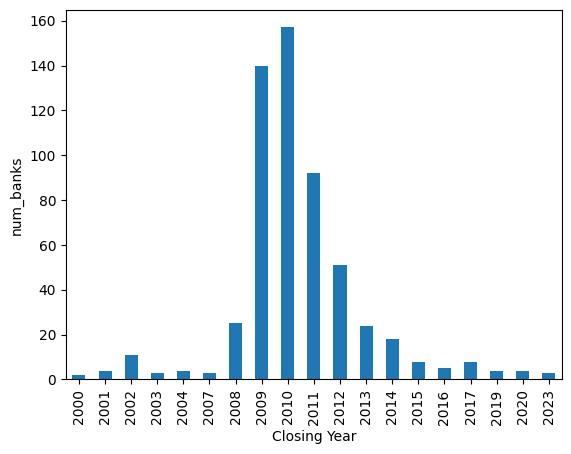

In [28]:
# Prepare the dataframe for plotting
banks_df['Closing Year'] = banks_df['Closing Date'].str[-2:].astype(int) + 2000

# plot a bar chart to show number of failed banks by year
banks_df.groupby('Closing Year').size().plot(kind='bar', ylabel='num_banks')

___
## Lesson Complete

Congratulations! You have completed *Pandas Intermediate 1*.

### Start Next Lesson: [Pandas intermediate 2 ->](./pandas-intermediate-2.ipynb)

### Exercise Solutions
Here are a few solutions for exercises in this lesson.

In [29]:
%%timeit -n 10
# find out how many runners are named James, with NumPy as backend
len(bm_22[bm_22['FullName'].str.startswith('James ')])

3.09 ms ± 144 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
%%timeit -n 10
# find out how many runners are named James, with pyarrow as backend
len(bm_22_pa[bm_22_pa['FullName'].str.startswith('James ')])

481 μs ± 55.3 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%%timeit -n 10
# find out how many runners are named Mary, with NumPy as backend
len(bm_22[bm_22['FullName'].str.startswith('Mary ')])

3.04 ms ± 52.7 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
%%timeit -n 10
# find out how many runners are named Mary, with pyarrow as backend
len(bm_22_pa[bm_22_pa['FullName'].str.startswith('Mary ')])

612 μs ± 177 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
### find out which year witnessed the most failed banks

# download the sample file
import urllib
url = 'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/Pandas1_failed_banks_since_2000.csv'
file = '../data/failed_banks.csv'
urllib.request.urlretrieve(url, file)
print('Sample file ready.')

# Read in the data
banks_df = pd.read_csv(file)

# create a new column storing the closing year
banks_df['Closing Year'] = banks_df['Closing Date'].str[-2:].astype(int)+2000

# group the data by closing year and get the number of failed banks in each year
banks_df.groupby('Closing Year').agg('size').sort_values(ascending=False)

Sample file ready.


Closing Year
2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2017      8
2015      8
2016      5
2020      4
2004      4
2019      4
2001      4
2023      3
2007      3
2003      3
2000      2
dtype: int64

In [34]:
### find out which state witnessed the most failed banks in 2010
banks_df.groupby(['Closing Year', 'State']).agg('size')[2010].sort_values(ascending=False)

State
FL    29
GA    21
IL    16
CA    12
WA    11
MN     8
MO     6
MI     5
SC     4
AZ     4
MD     4
NV     4
PR     3
NY     3
OR     3
UT     3
KS     3
NM     2
PA     2
OH     2
WI     2
TX     1
VA     1
AL     1
OK     1
NJ     1
AR     1
MS     1
MA     1
LA     1
NE     1
dtype: int64